# Project Description

My name is Mohammad Abdus Samad.I am working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago.My task is to find patterns in the available information.I want to understand passenger preferences and the impact of external factors on rides.

# Project Goal

Analyzing data from competitors, and test a hypothesis about the impact of weather on ride frequency.

# Project Contents

-  <a href='#the_destination4'>Exploratory data analysis (Python)</a>
-  <a href='#the_destination5'>Testing hypotheses (Python)</a>
-  <a href='#the_destination'>Overall Conclusion</a>

<a id='the_destination4'></a>
# Step 4. Exploratory data analysis (Python)

**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

**Information for the "project_sql_result_01" dataset:**

In [2]:
try:
    project_sql_result_01 = pd.read_csv('project_sql_result_01.csv')
except:
    project_sql_result_01 = pd.read_csv('/datasets/project_sql_result_01.csv.')
project_sql_result_01.info()
display(project_sql_result_01)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


There are 64 rows & 2 columns in the 'project_sql_result_01' dataset.

**Checking data types:**

In [3]:
project_sql_result_01.dtypes

company_name    object
trips_amount     int64
dtype: object

In the 'project_sql_result_01' dataset, 'company_name' column is object data type & 'trips_amount' is the integer data type.

**Checking duplicates in the 'project_sql_result_01' dataset:**

In [4]:
print(project_sql_result_01.duplicated().sum())

0


In the 'project_sql_result_01' dataset, there are no duplicate values.

**Checking missing values in the 'project_sql_result_01' dataset:**

In [5]:
project_sql_result_01.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In the 'project_sql_result_01' dataset, there are no missing values.

**Information for the "project_sql_result_04" dataset:**

In [6]:
try:
    project_sql_result_04 = pd.read_csv('project_sql_result_04.csv')
except:
    project_sql_result_04 = pd.read_csv('/datasets/project_sql_result_04.csv.')
project_sql_result_04.info()
display(project_sql_result_04)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


There are 94 rows & 2 columns in the 'project_sql_result_04' dataset.

**Checking data types:**

In [7]:
project_sql_result_04.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

In the 'project_sql_result_04' dataset, 'average_trips' column is float data type & 'dropoff_location_name' is the string data type.

**Checking duplicates in the 'project_sql_result_04' dataset:**

In [8]:
print(project_sql_result_04.duplicated().sum())

0


In the 'project_sql_result_04' dataset, there are no duplicate values.

**Checking missing values in the 'project_sql_result_04' dataset:**

In [9]:
project_sql_result_04.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In the 'project_sql_result_04' dataset, there are no missing values.

**Determining top 10 taxi "company_name" considering "trips_amount":**

In [10]:
top_10_taxi = project_sql_result_01.nlargest(10,'trips_amount')
print( top_10_taxi)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


The three taxi named "Flash cab", "Taxi Affiliation Services" and "Medallion Leasing" have trips_amount more than 10000.

**Determining top 10 neighborhoods "dropoff_location_name" considering "average_trips":**

In [11]:
top_10_neighborhoods = project_sql_result_04.nlargest(10,'average_trips')
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Among all of the dropoff_location_name, only "Loop" has average_trips more than 10000. Except "Loop" dropoff_location_name others have average_trips less than 10000.

**Drwaing histogram for "trips_amount":**

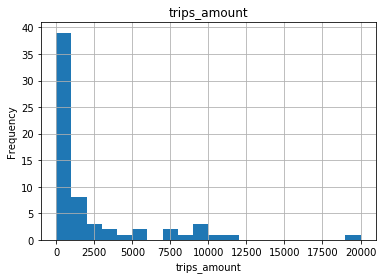

In [12]:
project_sql_result_01.hist('trips_amount', bins = 20, range = (0,20000))
plt.xlabel('trips_amount')
plt.ylabel('Frequency')
plt.show()


In the project_sql_result_01 dataset, maximum number of trips_amount are between 0 to around 1000.

**Drwaing histogram for "average_trip":**

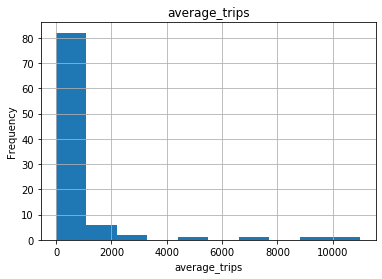

In [13]:
project_sql_result_04.hist('average_trips', bins = 10, range = (0,11000))
plt.xlabel('average_trips')
plt.ylabel('Frequency')
plt.show()

In the project_sql_result_04 dataset, maximum number of average_trips are between 0 to  around 1000.

Finally
-  There are 64 rows & 2 columns in the 'project_sql_result_01' dataset.
-  There are 94 rows & 2 columns in the 'project_sql_result_04' dataset.
-  The three taxi named "Flash cab", "Taxi Affiliation Services" and "Medallion Leasing" have trips_amount more than 10000.
-  Among all of the dropoff_location_name, only "Loop" has average_trips more than 10000. Except "Loop" dropoff_location_name others have average_trips less than 10000.
-  In the project_sql_result_01 dataset, maximum number of trips_amount are between 0 to around 1000.
-  In the project_sql_result_04 dataset, maximum number of average_trips are between 0 to around 1000.

<a id='the_destination5'></a>
# Step 5. Testing hypotheses(Python)

**Information for the "project_sql_result_07" dataset:**

In [14]:
try:
    project_sql_result_07 = pd.read_csv('project_sql_result_07.csv')
except:
    project_sql_result_07 = pd.read_csv('/datasets/project_sql_result_07.csv.')
project_sql_result_07.info()
display(project_sql_result_07)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


There are 1068 rows & 3 columns in the 'project_sql_result_07' dataset.

**Checking data types:**

In [15]:
project_sql_result_07.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In the 'project_sql_result_07' dataset, 'weather_conditions' column is object data type , 'duration_seconds' is the float data type & 'start_ts' column is object data type.

**Changing data types in the "duration_seconds" and "start_ts" column:**

In [16]:
project_sql_result_07['duration_seconds'] = project_sql_result_07['duration_seconds'].astype(int)
project_sql_result_07['start_ts'] = pd.to_datetime(project_sql_result_07['start_ts'], format='%Y-%m-%d %H:%M:%S')

In the project_sql_result_07 dataset, "duration_seconds" column was float data type. I converted it from float to integer & "start_ts" column was object data type. I converted it from object to date time format.

**Checking duplicates in the 'project_sql_result_07' dataset:**

In [17]:
print(project_sql_result_07.duplicated().sum())

197


In the 'project_sql_result_07' dataset, there are 197 duplicate values.

**Deleting duplicates in the 'project_sql_result_07' dataset:**

In [18]:
project_sql_result_07.drop_duplicates().reset_index(drop = True)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
866,2017-11-04 14:00:00,Good,2700
867,2017-11-18 16:00:00,Bad,2186
868,2017-11-25 11:00:00,Good,0
869,2017-11-11 10:00:00,Good,1318


I deleted the duplicated values in the project_sql_result_07 dataset.

**Checking missing values in the 'project_sql_result_07' dataset:**

In [19]:
project_sql_result_07.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In the 'project_sql_result_07' dataset, there are no missing values.

**Hypothsis formulation:**

- Null Hypothesis (H_0) : The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


- Alternative hypothesis (H_1) : The average duration of rides from the Loop to O'Hare International Airport changes on sunny Saturdays.

**Comparison of variance for the "Good" and "Bad" weather_conditions:**

In [20]:
variance_01 = np.var(project_sql_result_07.query('weather_conditions == "Good"')['duration_seconds'])
variance_02 = np.var(project_sql_result_07.query('weather_conditions == "Bad"')['duration_seconds'])
 
if variance_01 == variance_02:
    print('both variance are equal')
elif variance_01 != variance_02:
    print('variance are not equal. So the parameter : equal_var = False ')
else:
    print("can not be compared")

variance are not equal. So the parameter : equal_var = False 


**Applying critical statistical significance level and getting decision regarding null hypothesis:**

In [21]:
alpha = 0.05 
results = st.ttest_ind(project_sql_result_07.query('weather_conditions == "Good"')['duration_seconds'],project_sql_result_07.query('weather_conditions == "Bad"')['duration_seconds'] , equal_var = False )
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 6.738994326108734e-12
We reject the null hypothesis


As we are rejecting null hypothesis that means the average duration of rides from the Loop to O'Hare International Airport changes on good Saturdays.

**Finding mean for the "Good" and "Bad" weather_conditions for "duration_seconds":**

In [22]:
#Calculation of averages duration of rides on sunny Saturdays
# we consider monday as value 0 so saturday = 5
# extract data where saturdays =    good weather
rides_no_rain = project_sql_result_07[(project_sql_result_07['weather_conditions'] =='Good')&(project_sql_result_07['start_ts'].dt.weekday==5)] ['duration_seconds'].values
print("number of rides with good weather on saturdays: ",len (rides_no_rain))
print("average duration  of rides with good weather on saturdays: ",rides_no_rain.mean())

#Calculation of averages duration of rides on rainy Saturdays
# we consider monday as value 0 so saturday = 5
# extract data where saturdays =   rainy
rides_bad = project_sql_result_07[(project_sql_result_07['weather_conditions'] =='Bad')&(project_sql_result_07['start_ts'].dt.weekday==5)]['duration_seconds'].values 
print("number of rides on rainy saturdays: ",len(rides_bad))
print("average duration  of rides on rainy saturdays:  ",rides_bad.mean())

number of rides with good weather on saturdays:  888
average duration  of rides with good weather on saturdays:  1999.6756756756756
number of rides on rainy saturdays:  180
average duration  of rides on rainy saturdays:   2427.2055555555557


 Average duration  of rides with good weather & rainy weather on saturdays are not same. Number of rides with good weather on saturdays are more compared to the number of rides on rainy saturdays.

<a id='the_destination'></a>
# Overall Conclusion

-  Passengers are more interested for using "Flash Cab", "Taxi Affiliation Services" & "Medallion Leasing" taxi company_name considering trips_amount.
-  Considering average_trips the most popular dropoff_location_name are Loop, River North, Streeterville & West Loop. 
-  Number of rides with good weather on saturdays are more compared to the number of rides on rainy saturdays.